# **Convolutional Neural Network**

Last week you learned how deep neural networks learn and how build DNN models for regression and classification using Sequential model and Dense layers. This week we will use neural networks for image classification. First we will build an image classifier using dense layers only, then we will enhace the model by adding convolutional layers. Later we will use a pre-trained model and also tune the model.This lesson was taken from the book [Deep Learning with Python](https://learning.oreilly.com/library/view/deep-learning-with/9781617294433/OEBPS/Text/05.xhtml).

In [1]:
import numpy as np
import os

# model
from keras.models import Sequential

# layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

# pretarined model
from keras.applications import VGG16

# kekeras.applicationss
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


# visual stuffs
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%%html
<img src='./images/Pixels.png', width=900, height=900>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch15.html)

## Images

For the entire lesson we used the [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats/data) dataset from Kaggle.

In [68]:
train_cats_dir = './dogs_cats/train/cats'
train_dogs_dir = './dogs_cats/train/dogs'

In [69]:
len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir))

(500, 500)

In [70]:
cat_names = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

dog_names = [os.path.join(train_dogs_dir, fname) for
     fname in os.listdir(train_dogs_dir)]

In [71]:
cat_names[0]

'./dogs_cats/train/cats/cat.946.jpg'

In [72]:
dog_names[0]

'./dogs_cats/train/dogs/dog.775.jpg'

In [73]:
cat_path = cat_names[0] 
cat = image.load_img(cat_path, target_size=(150, 150))  

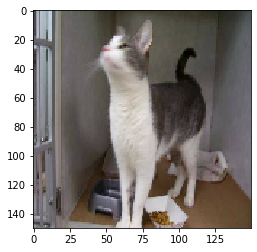

In [74]:
plt.imshow(cat)

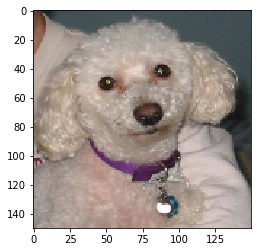

In [75]:
dog = image.load_img(dog_names[0], target_size=(150, 150))  
plt.imshow(dog)

In [76]:
type(cat)

PIL.Image.Image

In [77]:
cat = image.img_to_array(cat) 

In [78]:
type(cat)

numpy.ndarray

In [79]:
cat.shape

(150, 150, 3)

In [80]:
dog = image.img_to_array(dog) 

print('Type: {}'.format(type(dog)))
print("\nShape: {}".format(dog.shape))

Type: <class 'numpy.ndarray'>

Shape: (150, 150, 3)


## Image Classification with Dense Layers

As you may already know the neurons in a dense layer are not connected but are interconected with all neurons in prior and sud-sequent layers. Before proceeding into more detail I should first explain what python generators are why use generators to train neural networks.

In [15]:
%%html
<img src='../Week6_4.23/Multi_NN.png', width=700, height=700>

### Python Generators

In [81]:
def make_list(nums):
    
    my_list = [num for num in range(nums)]
    
    return my_list
    

In [82]:
my_list = make_list(5)

In [83]:
for i in my_list:
    print(i)

0
1
2
3
4


In [84]:
for i in my_list:
    print(i)

0
1
2
3
4


In [85]:
def make_generator(nums):
    
    for num in range(nums):
        yield num

In [86]:
make_gen = make_generator(5)

In [87]:
for i in make_gen:
    print(i)

0
1
2
3
4


In [88]:
for i in make_gen:
    print(i)

In [89]:
make_gen = make_generator(5)

In [90]:
for i in make_gen:
    print(i)

0
1
2
3
4


In [91]:
for i in make_gen:
    print(i)

In [92]:
for i in my_list:
    print(i)

0
1
2
3
4


In [24]:
for i in make_generator(5):
    print(i)

0
1
2
3
4


### Preparing the Data

In [93]:
cat.shape

(150, 150, 3)

In [95]:
cat.max(), cat.min()

(251.0, 0.0)

In [96]:
train_dir = './dogs_cats/train'
valid_dir = './dogs_cats/valid'
test_dir = './dogs_cats/test'

In [97]:
train_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

In [98]:
train_generator = train_gen.flow_from_directory(
                    train_dir, 
                    target_size=(150, 150), 
                    batch_size=20, 
                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
test_generator = test_gen.flow_from_directory(
                    test_dir, 
                    target_size=(150, 150), 
                    batch_size=20, 
                    class_mode='binary')

Found 200 images belonging to 2 classes.


In [29]:
valid_generator = test_gen.flow_from_directory(
                    valid_dir, 
                    target_size=(150, 150), 
                    batch_size=20, 
                    class_mode='binary')

Found 200 images belonging to 2 classes.


### Dense Layers Model

In [99]:
dog.shape

(150, 150, 3)

In [30]:
model = Sequential()

model.add(Dense(200, input_shape=(150, 150, 3), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [100]:
150*150*200

4500000

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150, 150, 200)     800       
_________________________________________________________________
dense_2 (Dense)              (None, 150, 150, 200)     40200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4500000)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4500001   
Total params: 4,541,001
Trainable params: 4,541,001
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                epochs=30, 
                validation_data=valid_generator, 
                validation_steps=15)

Epoch 1/30
20/20 [==============================] - 19s 934ms/step - loss: 0.6884 - acc: 0.5225 - val_loss: 0.6937 - val_acc: 0.5367
Epoch 2/30
20/20 [==============================] - 19s 935ms/step - loss: 0.6835 - acc: 0.5700 - val_loss: 0.7000 - val_acc: 0.5267
Epoch 3/30
20/20 [==============================] - 19s 962ms/step - loss: 0.6754 - acc: 0.6125 - val_loss: 0.7025 - val_acc: 0.5267
Epoch 4/30
20/20 [==============================] - 19s 951ms/step - loss: 0.6732 - acc: 0.5825 - val_loss: 0.6425 - val_acc: 0.5933
Epoch 5/30
20/20 [==============================] - 19s 930ms/step - loss: 0.6591 - acc: 0.6325 - val_loss: 0.7809 - val_acc: 0.4867
Epoch 6/30
20/20 [==============================] - 19s 936ms/step - loss: 0.6617 - acc: 0.6025 - val_loss: 0.6854 - val_acc: 0.5767
Epoch 7/30
20/20 [==============================] - 19s 944ms/step - loss: 0.6463 - acc: 0.6100 - val_loss: 0.7056 - val_acc: 0.5533
Epoch 8/30
20/20 [==============================] - 19s 933ms/step - 

## Convolutional Neural Network (CNN)

Convolutional layers can be considered as filters that extract the important features from an image. Compared to dense layers, convolutional layers share the weights within a single layer. Convolutional layers work by first taking small patches then taking dot product of the patch and a kernel filter. After each convolution lthe heigh and width omage will shrink while the numbers of channels will increase. A simple explanation of how CNN work can be found [here](https://www.youtube.com/watch?v=x_VrgWTKkiM). More detailed explanation are found [here](https://learning.oreilly.com/videos/understanding-convolutional-neural/9781491978931/9781491978931-video312598).

In [34]:
%%html
<img src='./images/CNN.png', width=500, height=500>

In [35]:
%%html
<img src='./images/Pooling.png', width=700, height=700>

[Image Source](https://learning.oreilly.com/library/view/python-machine-learning/9781787125933/ch15.html)

In [36]:
%%html
<img src='./images/CNNFC.png', width=1000, height=1000>

[Image Source](https://www.kdnuggets.com/2016/11/intuitive-explanation-convolutional-neural-networks.html/3)

In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [39]:
model.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                epochs=30, 
                validation_data=valid_generator, 
                validation_steps=15)

Epoch 1/30
20/20 [==============================] - 4s 223ms/step - loss: 0.6936 - acc: 0.5075 - val_loss: 0.6796 - val_acc: 0.5067
Epoch 2/30
20/20 [==============================] - 4s 216ms/step - loss: 0.6967 - acc: 0.4700 - val_loss: 0.6894 - val_acc: 0.5733
Epoch 3/30
20/20 [==============================] - 4s 212ms/step - loss: 0.6896 - acc: 0.5250 - val_loss: 0.6907 - val_acc: 0.5500
Epoch 4/30
20/20 [==============================] - 4s 210ms/step - loss: 0.6862 - acc: 0.5350 - val_loss: 0.6833 - val_acc: 0.5733
Epoch 5/30
20/20 [==============================] - 4s 206ms/step - loss: 0.6880 - acc: 0.5325 - val_loss: 0.7110 - val_acc: 0.5033
Epoch 6/30
20/20 [==============================] - 4s 212ms/step - loss: 0.6862 - acc: 0.5225 - val_loss: 0.7044 - val_acc: 0.5167
Epoch 7/30
20/20 [==============================] - 4s 209ms/step - loss: 0.6862 - acc: 0.5350 - val_loss: 0.7097 - val_acc: 0.5367
Epoch 8/30
20/20 [==============================] - 4s 221ms/step - loss: 0.

## CNN with Data Augmentation

In [40]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


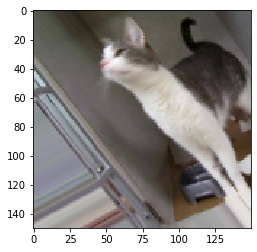

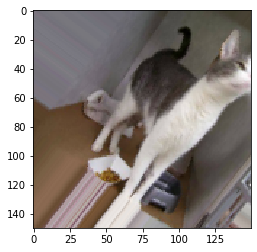

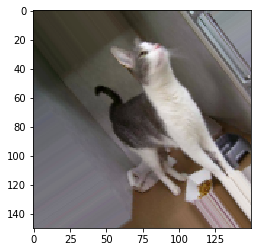

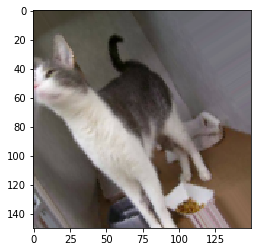

In [42]:
cat = image.img_to_array(cat)                                     
cat = cat.reshape((1,) + cat.shape)                                   

i = 0                                                           
for batch in datagen.flow(cat, batch_size=1):                     
    plt.figure(i)                                               
    imgplot = plt.imshow(image.array_to_img(batch[0]))          
    i += 1                                                    
    if i % 4 == 0:                                 
        break                                              

plt.show()

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)



In [44]:
train_generator = train_datagen.flow_from_directory(
        train_dir,                                          
        target_size=(150, 150),                             
        batch_size=32,
        class_mode='binary') 

Found 1000 images belonging to 2 classes.


In [45]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [46]:
model.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                epochs=30, 
                validation_data=valid_generator, 
                validation_steps=15)

Epoch 1/30
20/20 [==============================] - 7s 370ms/step - loss: 0.6932 - acc: 0.4938 - val_loss: 0.6747 - val_acc: 0.4967
Epoch 2/30
20/20 [==============================] - 6s 321ms/step - loss: 0.6932 - acc: 0.5135 - val_loss: 0.6855 - val_acc: 0.5133
Epoch 3/30
20/20 [==============================] - 7s 335ms/step - loss: 0.6914 - acc: 0.5172 - val_loss: 0.7018 - val_acc: 0.5167
Epoch 4/30
20/20 [==============================] - 7s 364ms/step - loss: 0.6909 - acc: 0.5266 - val_loss: 0.6963 - val_acc: 0.5433
Epoch 5/30
20/20 [==============================] - 6s 323ms/step - loss: 0.6894 - acc: 0.5325 - val_loss: 0.6856 - val_acc: 0.5067
Epoch 6/30
20/20 [==============================] - 7s 328ms/step - loss: 0.6913 - acc: 0.5211 - val_loss: 0.6892 - val_acc: 0.5367
Epoch 7/30
20/20 [==============================] - 7s 341ms/step - loss: 0.6862 - acc: 0.5828 - val_loss: 0.6987 - val_acc: 0.5267
Epoch 8/30
20/20 [==============================] - 7s 334ms/step - loss: 0.

## Pre-Trained CNN

For small datasets we can use a pre-trained machine learning model and attach a fully connected dense layers at the top to enhance the task. Keras does provide with a set of pre-trained models, [Keras pre-trained CNN](https://keras.io/applications/). For this lesson we will use VGG 16 model.

### VGG16

In [47]:
vgg = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3))

In [48]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [49]:
model = Sequential()

model.add(vgg)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               1638600   
_________________________________________________________________
dense_11 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 201       
Total params: 16,393,689
Trainable params: 16,393,689
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                epochs=30, 
                validation_data=valid_generator, 
                validation_steps=15)

Epoch 1/30
20/20 [==============================] - 90s 4s/step - loss: 0.6903 - acc: 0.5766 - val_loss: 0.7248 - val_acc: 0.5033
Epoch 2/30
20/20 [==============================] - 101s 5s/step - loss: 0.5811 - acc: 0.6948 - val_loss: 0.3390 - val_acc: 0.8433
Epoch 3/30
20/20 [==============================] - 96s 5s/step - loss: 0.6959 - acc: 0.5828 - val_loss: 0.6689 - val_acc: 0.6867
Epoch 4/30
20/20 [==============================] - 96s 5s/step - loss: 0.6490 - acc: 0.6136 - val_loss: 0.5036 - val_acc: 0.8367
Epoch 5/30
20/20 [==============================] - 92s 5s/step - loss: 0.5984 - acc: 0.6786 - val_loss: 0.6735 - val_acc: 0.5500
Epoch 6/30
20/20 [==============================] - 99s 5s/step - loss: 0.5390 - acc: 0.7422 - val_loss: 0.7478 - val_acc: 0.5033
Epoch 7/30
20/20 [==============================] - 97s 5s/step - loss: 0.6256 - acc: 0.6375 - val_loss: 0.3255 - val_acc: 0.8967
Epoch 8/30
20/20 [==============================] - 98s 5s/step - loss: 0.4939 - acc: 0.7

## Pre-Trained CNN Tuning

In [53]:
vgg = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3))

In [54]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [55]:
vgg.trainable = True

set_trainable = False
for layer in vgg.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [59]:
model = Sequential()

model.add(vgg)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               1638600   
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 201       
Total params: 16,393,689
Trainable params: 8,758,425
Non-trainable params: 7,635,264
_________________________________________________________________


In [61]:
model.fit_generator(
                train_generator, 
                steps_per_epoch=20, 
                epochs=30, 
                validation_data=valid_generator, 
                validation_steps=15)

Epoch 1/30
20/20 [==============================] - 44s 2s/step - loss: 0.6838 - acc: 0.5860 - val_loss: 0.4762 - val_acc: 0.8267
Epoch 2/30
20/20 [==============================] - 46s 2s/step - loss: 0.6016 - acc: 0.6734 - val_loss: 0.5091 - val_acc: 0.7900
Epoch 3/30
20/20 [==============================] - 46s 2s/step - loss: 0.5825 - acc: 0.7078 - val_loss: 0.5900 - val_acc: 0.8267
Epoch 4/30
20/20 [==============================] - 43s 2s/step - loss: 0.4909 - acc: 0.7652 - val_loss: 0.2036 - val_acc: 0.8800
Epoch 5/30
20/20 [==============================] - 46s 2s/step - loss: 0.4664 - acc: 0.7719 - val_loss: 0.1917 - val_acc: 0.9067
Epoch 6/30
20/20 [==============================] - 45s 2s/step - loss: 0.4057 - acc: 0.8247 - val_loss: 0.2899 - val_acc: 0.8967
Epoch 7/30
20/20 [==============================] - 44s 2s/step - loss: 0.4257 - acc: 0.7987 - val_loss: 0.4000 - val_acc: 0.8867
Epoch 8/30
20/20 [==============================] - 46s 2s/step - loss: 0.3707 - acc: 0.84

In [62]:
model.evaluate_generator(valid_generator)

[0.08478953689336777, 0.9599999785423279]

In [63]:
model.evaluate_generator(test_generator)

[0.13631682097911835, 0.9549999833106995]

### **NOTE**: The weights in convolutional layers are shared while dense layers are not.